<a href="https://colab.research.google.com/github/sanjeet123456789/python-deep-learning/blob/master/Image_Classification_using_Logistic_Regression_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
#downloading training dataset
dataset=MNIST(root='data/',download=True)

print(len(dataset))

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!
60000


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
test_dataset=MNIST(root='data/',train=False)
print(len(test_dataset))

print(dataset[0])

10000
(<PIL.Image.Image image mode=L size=28x28 at 0x7FD9FA4E2390>, 5)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 8


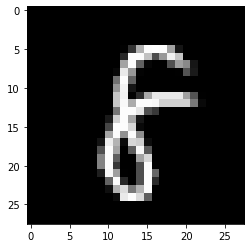

In [10]:
#looking images from a dataset
Image,label=dataset[456]
plt.imshow(Image,cmap='gray')
print('Label:',label)

In [0]:
import torchvision.transforms as transforms

#MNIST dataset (images and label)
#convert image into pytorch tensor




In [0]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

torch.Size([1, 28, 28]) 5


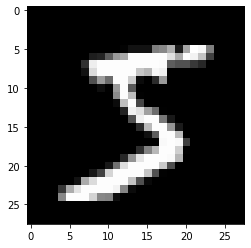

In [32]:
#convert into image tensor and viewing it
img_tensor,label=dataset[0]
print(img_tensor.shape,label)
plt.imshow(img_tensor[0,:,:],cmap='gray')

In [33]:
#viewing the pixel of the image between 10and 15
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


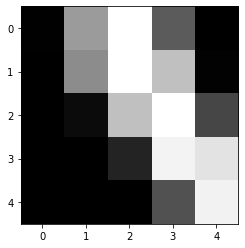

In [34]:
#plot the image by passing in the 28*28 matrix
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

In [35]:
#Training and validation datasets 
#Training set(used to adjust the weights)
#Validation set(evaluate the model while training and pick the best model adjust the hyperparameter)
#Test set(compare different models)
import numpy as np
n=6000
val_pct=0.5
n_val=int(val_pct*n)
idxs=np.random.permutation(n)
print(idxs)

[4656 1254  792 ... 5381 2699 4714]


In [0]:
import numpy as np
def split_indices(n,val_pct):
    #Getting size of validation set
    n_val=int(val_pct*n)
    #create random permutation of 0 to n-1
    idxs=np.random.permutation(n)
    #pick first n_val indices for validation set
    return idxs[n_val:],idxs[:n_val]

In [41]:
#split into taining and validation and 
#test we already have in another dataset
train_indices,val_indices=split_indices(len(dataset),val_pct=0.2)
print(len(train_indices),len(val_indices))
print('Sample val indices:',val_indices[:20])

48000 12000
Sample val indices: [30809 25744 51656 57534 50857 16122 50993  5979 49197 13278 36276 36496
 42211 19171  1932 12133 45331 15028 13181 32456]


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [0]:
batch_size=100
#Training sampler and data loader
train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset,batch_size,sampler=train_sampler)

#Validation sampler and data loader
val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(dataset,batch_size,sampler=val_sampler)


In [44]:
#Defining model
#nn.Linear except each training examle to be a vector ,each1*28*28 image 
#tensor need to be flattened out into a vector of size 28*28 before passing into the model

#output of each image is vector oh size 10,with each element signified
#thethe probability target label(0-9) .The predictioed ;abel for an image is simple one with
#the highest probability
import torch.nn as nn
input_size=28*28#getting a vector or 28*28 pixel
num_classes=10#there are 10 output 
#Logistics regression model
model=nn.Linear(input_size,num_classes)

print(model.weight.shape)
print(model.weight)

print(model.bias.shape)
print(model.bias)

print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0106,  0.0350,  0.0016,  ..., -0.0197,  0.0168, -0.0016],
        [-0.0132, -0.0345, -0.0058,  ...,  0.0143, -0.0052, -0.0237],
        [ 0.0346, -0.0301,  0.0295,  ..., -0.0262,  0.0050,  0.0262],
        ...,
        [ 0.0029,  0.0159,  0.0186,  ..., -0.0169, -0.0231,  0.0007],
        [ 0.0009, -0.0215, -0.0099,  ...,  0.0225, -0.0214,  0.0084],
        [-0.0313,  0.0061,  0.0300,  ...,  0.0185, -0.0013,  0.0248]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0193,  0.0347,  0.0349,  0.0341, -0.0125, -0.0025, -0.0096,  0.0143,
        -0.0284,  0.0203], requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0193,  0.0347,  0.0349,  0.0341, -0.0125, -0.0025, -0.0096,  0.0143,
        -0.0284,  0.0203], requires_grad=True)


In [0]:
#reshape method of a tensor which will allow us to efficiently 'view' each image as a flat vector ,without reallychanging the underlying data
#give as error
# for images,labels in train_loader:
#     print(labels)
#     print(images.shape)
#     outputs=model(images)
#     break
    

In [0]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [49]:
print(model.linear.weight.shape)
print(list(model.parameters()))

torch.Size([10, 784])
[Parameter containing:
tensor([[-0.0228,  0.0002,  0.0278,  ...,  0.0053, -0.0210,  0.0251],
        [-0.0345,  0.0139,  0.0255,  ...,  0.0063, -0.0267, -0.0348],
        [ 0.0010,  0.0158,  0.0269,  ...,  0.0204, -0.0193, -0.0344],
        ...,
        [ 0.0012, -0.0046,  0.0224,  ...,  0.0339,  0.0330,  0.0010],
        [-0.0321,  0.0034,  0.0279,  ...,  0.0196,  0.0244, -0.0028],
        [-0.0142, -0.0224,  0.0268,  ...,  0.0331, -0.0322, -0.0340]],
       requires_grad=True), Parameter containing:
tensor([-1.2442e-06,  1.4036e-02, -4.4941e-03, -1.0189e-02,  9.8048e-03,
         2.7866e-02,  1.1330e-02, -3.4263e-02,  3.1835e-02, -2.2181e-02],
       requires_grad=True)]


In [50]:
for images,labels in train_loader:
    outputs=model(images)
    break
print('outputs.shape:',outputs.shape)
print('Sample output:\n',outputs[:2].data)

outputs.shape: torch.Size([100, 10])
Sample output:
 tensor([[ 0.0924, -0.2216,  0.3231,  0.0358, -0.0206,  0.0951, -0.1252,  0.0347,
         -0.0209,  0.1723],
        [ 0.1111,  0.0018,  0.2093,  0.0983, -0.0155,  0.0831, -0.1144,  0.0617,
         -0.0097, -0.0593]])


In [52]:
#softmax function get output and givide the probability into 
#using e to power y
import torch.nn.functional as F
#specify a dimension along which the softmax must be applied

#Apply softmax for each output row
probs =F.softmax(outputs,dim=1)

#Look at sample probabilities
print("Sample probabilities:\n",probs[:2].data)


#Add up the probabilities of an output row
print("sum:",torch.sum(probs[1]).item())

Sample probabilities:
 tensor([[0.1047, 0.0765, 0.1318, 0.0989, 0.0935, 0.1049, 0.0842, 0.0988, 0.0934,
         0.1134],
        [0.1073, 0.0962, 0.1184, 0.1059, 0.0945, 0.1043, 0.0856, 0.1021, 0.0951,
         0.0905]])
sum: 1.0


In [55]:
#Finally determine the prediction label for each image by simple
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)
#compare with actual label
print(labels) #it will be very different because random weight and baise


tensor([2, 2, 2, 4, 5, 8, 8, 7, 4, 8, 2, 9, 8, 4, 2, 8, 8, 4, 2, 2, 5, 4, 8, 2,
        7, 9, 2, 2, 8, 8, 4, 8, 8, 0, 0, 2, 8, 2, 8, 8, 0, 5, 8, 2, 2, 8, 2, 8,
        2, 2, 2, 8, 5, 2, 2, 4, 2, 2, 4, 8, 2, 2, 0, 4, 4, 2, 4, 2, 2, 2, 5, 8,
        8, 2, 0, 8, 3, 2, 8, 5, 8, 8, 2, 4, 2, 4, 8, 8, 8, 4, 0, 8, 0, 4, 4, 8,
        8, 1, 8, 2])
tensor([0.1318, 0.1184, 0.1199, 0.1542, 0.1271, 0.1446, 0.1319, 0.1174, 0.1341,
        0.1196, 0.1242, 0.1428, 0.1470, 0.1421, 0.1229, 0.1458, 0.1513, 0.1264,
        0.1705, 0.1296, 0.1189, 0.1309, 0.1311, 0.1296, 0.1112, 0.1195, 0.1351,
        0.1199, 0.1625, 0.1150, 0.1363, 0.1432, 0.1490, 0.1340, 0.1360, 0.1653,
        0.1287, 0.1188, 0.1747, 0.1181, 0.1198, 0.1259, 0.1585, 0.1514, 0.1275,
        0.1302, 0.1309, 0.1510, 0.1377, 0.1317, 0.1559, 0.1569, 0.1282, 0.1520,
        0.1490, 0.1359, 0.1544, 0.1223, 0.1280, 0.1472, 0.1151, 0.1577, 0.1131,
        0.1160, 0.1552, 0.1298, 0.1495, 0.1333, 0.1517, 0.1475, 0.1382, 0.1365,
        0.1308, 0.1

In [58]:
#Evaluation Metric and Loss Function
def accuracy(loss1,loss2):
    return torch.sum(loss1==loss2).item()/len(loss1)

print(torch.sum(label==preds).item()/len(labels))

0.06


In [59]:
print(accuracy(preds,labels))

0.08


In [61]:
#Cross Entrophy(continuous and diferential) -sum of yi*log(predicted probability)
##we cannot use ==,torch.max for differential to get at final result
#we can do convert label into vector and also actual target probability value into vector
#by takiing the log to actual probability we can find the best
#[0,0,0,1,0,0,0,0,0,0,0,0,]
#[0.11000,0.220552,0.1000000,0.000023,0.15545,0.11213]
#(-ve)math.log(0.000023)#log to make smaller to much low and high value too mush high
#we donot care for rest value so, by multiplying with 0 we get zero value

loss_fn=F.cross_entropy
#loss for current batch of data
loss=loss_fn(outputs,labels)
print(loss)
#cross entropy is the negative algorithm of the predicted probability of the correct label
#averaged over all training sample ,one way to interpret the resulting number.Eg2.23 E^2.23=0.1 which mean (10% as the predicted 
#probability lower the loss better the model)


tensor(2.3140, grad_fn=<NllLossBackward>)


In [0]:

#optimizer (updating the weight and baise during trainingwith higher rate of le-3 
#addding  output with proportinate of output )
learning_rate=0.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)


In [0]:
#trining the model
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    #Calculate the loss
    preds=model(xb)
    
    loss=loss_func(preds,yb)
    if opt is not None:
        #Compute gradients
        loss.backward()
        #update parameters
        opt.step()
        #Reset gradients
        opt.zero_grad()
    metric_result=None
    if metric is not None:
        metric_result=metric(preds,yb)       
    return loss.item(),len(xb),metric_result 

In [0]:
#Calculate the overall loss and accuracy
def evaluate(model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        #passing each batch through the model
        results=[loss_batch(model,loss_fn,xb,yb,metric=metric)
                for xb,yb in valid_dl]
        #Seprate losses,counts and metrics
        losses,nums,metrics=zip(*results)
        #Total size fo the dataset
        total =np.sum(nums)
      
        #Avg loss across batches
        avg_loss=np.sum(np.multiply(losses,nums))/total
        avg_metric=None
        if metric is not None:
            #Avg of metric across batches
            avg_metric=np.sum(np.multiply(metrics,nums))/total
    return avg_loss,total,avg_metric

In [70]:

#redifine accuracy to operate on an entire batch of outputdirectly
#so that we can use it as an metric in fit

def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item()/len(preds)



val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))
   

Loss: 2.2809, Accuracy: 0.1447


In [72]:
#Redefine model and optimizer
model=MnistModel()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5], Loss: 1.8563, accuracy: 0.6594
Epoch [2/5], Loss: 1.5619, accuracy: 0.7391
Epoch [3/5], Loss: 1.3552, accuracy: 0.7710
Epoch [4/5], Loss: 1.2065, accuracy: 0.7927
Epoch [5/5], Loss: 1.0959, accuracy: 0.8059
Epoch [1/5], Loss: 1.0110, accuracy: 0.8148
Epoch [2/5], Loss: 0.9438, accuracy: 0.8213
Epoch [3/5], Loss: 0.8895, accuracy: 0.8269
Epoch [4/5], Loss: 0.8446, accuracy: 0.8317
Epoch [5/5], Loss: 0.8069, accuracy: 0.8357
Epoch [1/5], Loss: 0.7747, accuracy: 0.8403
Epoch [2/5], Loss: 0.7469, accuracy: 0.8441
Epoch [3/5], Loss: 0.7226, accuracy: 0.8472
Epoch [4/5], Loss: 0.7011, accuracy: 0.8497
Epoch [5/5], Loss: 0.6820, accuracy: 0.8520
Epoch [1/5], Loss: 0.6650, accuracy: 0.8538
Epoch [2/5], Loss: 0.6496, accuracy: 0.8551
Epoch [3/5], Loss: 0.6356, accuracy: 0.8569
Epoch [4/5], Loss: 0.6229, accuracy: 0.8587
Epoch [5/5], Loss: 0.6112, accuracy: 0.8612


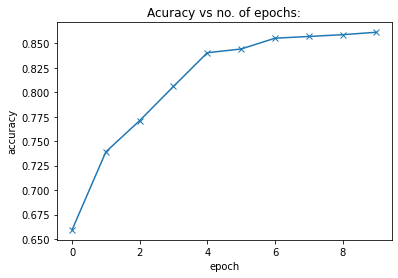

In [77]:
#this is a linear realationship model(logistic-regression) 
accuracies=[0.6594,0.7391,0.7710,0.8059,0.8403,0.8441,0.8551,0.8569,0.8587,0.8612]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Acuracy vs no. of epochs:');

shape: torch.Size([1, 28, 28])
label: 5


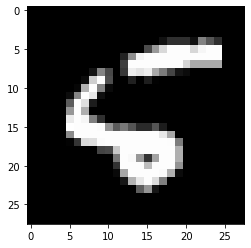

In [92]:
#Testing the datset
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor())
img,label=test_dataset[8]
plt.imshow(img[0],cmap='gray')
print('shape:',img.shape)
print('label:',label)
#conver into batch of one image in zero dimension 28*28
#img.unsqueeze(0).shape

In [93]:
#convert into batch of one image in zero dimension 28*28
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [0]:
def predict_image(img,model):
    xb=img.unsqueeze(0)
    yb=model(xb)
    _,preds=torch.max(yb,dim=1)
    return preds[0].item()


Label: 8 Predicted: 3


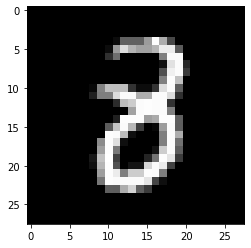

In [99]:
img,label=test=test_dataset[184]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

In [101]:
#Saving and Loading the model
torch.save(model.state_dict(),'mnist-logistic.pth')
model.state_dict()


OrderedDict([('linear.weight',
              tensor([[-0.0313,  0.0106,  0.0030,  ..., -0.0181,  0.0326, -0.0067],
                      [-0.0213, -0.0146,  0.0254,  ...,  0.0137, -0.0343, -0.0183],
                      [ 0.0219, -0.0074, -0.0079,  ...,  0.0165, -0.0313,  0.0149],
                      ...,
                      [-0.0298, -0.0006, -0.0015,  ...,  0.0153,  0.0114,  0.0017],
                      [-0.0254, -0.0042, -0.0044,  ..., -0.0212,  0.0137,  0.0017],
                      [-0.0318,  0.0169,  0.0291,  ..., -0.0196,  0.0027, -0.0101]])),
             ('linear.bias',
              tensor([-0.0820,  0.0687, -0.0431, -0.0168,  0.0030,  0.0454,  0.0060,  0.0765,
                      -0.0797,  0.0235]))])

In [104]:
#to load the model
#.load_state_dict

model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0313,  0.0106,  0.0030,  ..., -0.0181,  0.0326, -0.0067],
                      [-0.0213, -0.0146,  0.0254,  ...,  0.0137, -0.0343, -0.0183],
                      [ 0.0219, -0.0074, -0.0079,  ...,  0.0165, -0.0313,  0.0149],
                      ...,
                      [-0.0298, -0.0006, -0.0015,  ...,  0.0153,  0.0114,  0.0017],
                      [-0.0254, -0.0042, -0.0044,  ..., -0.0212,  0.0137,  0.0017],
                      [-0.0318,  0.0169,  0.0291,  ..., -0.0196,  0.0027, -0.0101]])),
             ('linear.bias',
              tensor([-0.0820,  0.0687, -0.0431, -0.0168,  0.0030,  0.0454,  0.0060,  0.0765,
                      -0.0797,  0.0235]))])

In [107]:
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))


Loss: 0.5963, Accuracy: 0.8682
Loss: 0.5963, Accuracy: 0.8682
